In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def mostrar_imagem(imagem, titulo, colorMap = None):
    if colorMap is not None:
        plt.imshow(imagem, cmap=colorMap)
    else:
        plt.imshow(imagem)
    plt.title(titulo)
    plt.show()

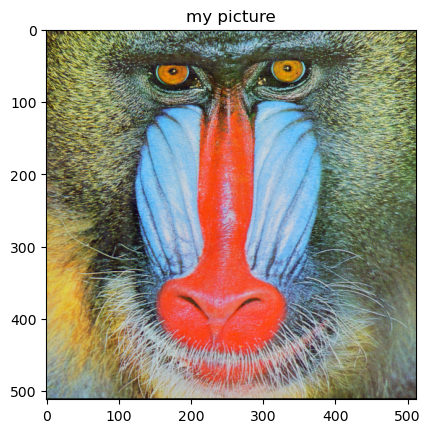

In [4]:
img = cv2.imread("baboon.png")
imagem = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.title('my picture')
plt.show()

Imagem (512, 512, 3)
[164 150  71]
Canal Vermelho (512, 512)
164


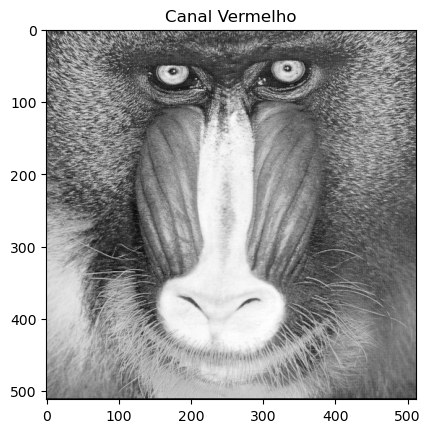

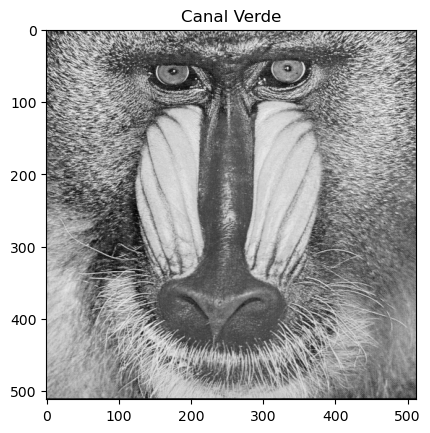

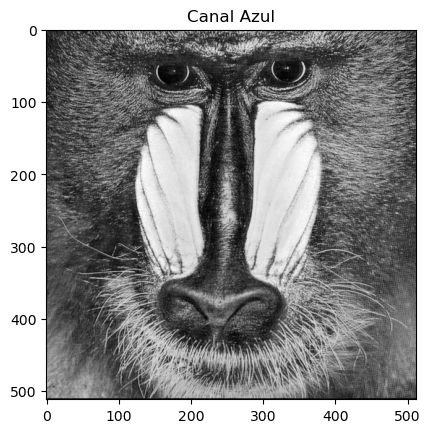

In [15]:
(canalVermelho, canalVerde, canalAzul) = cv2.split(imagem) 
print("Imagem", imagem.shape)
print(imagem[0,0])
print("Canal Vermelho", canalVermelho.shape)
print(canalVermelho[0,0])
mostrar_imagem(canalVermelho, "Canal Vermelho", "gray")
mostrar_imagem(canalVerde, "Canal Verde","gray")
mostrar_imagem(canalAzul, "Canal Azul", "gray")

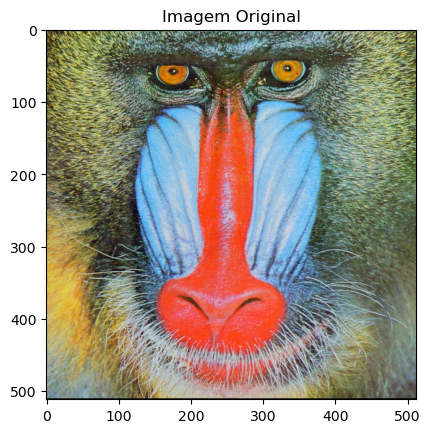

In [6]:
resultado = cv2.merge([canalVermelho, canalVerde, canalAzul]) 
mostrar_imagem(resultado, "Imagem Original")

(512, 512, 3)
(512, 512)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


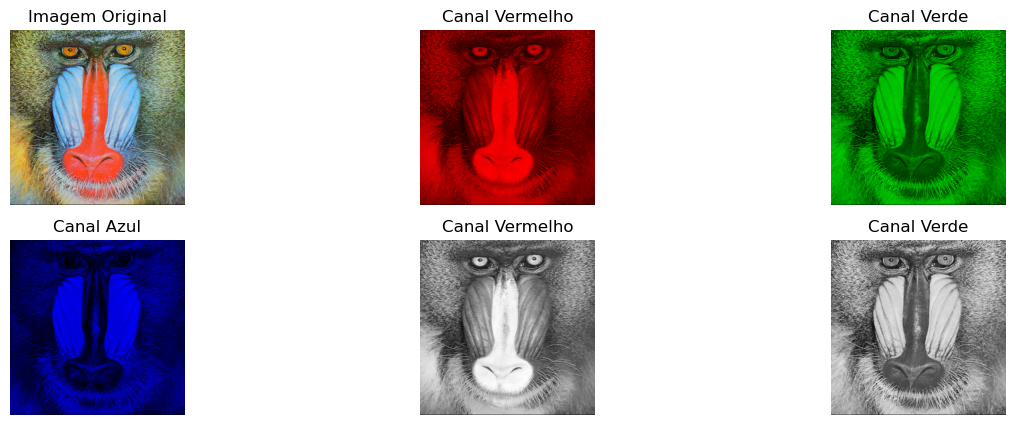

In [68]:
zeros = np.zeros(imagem.shape[:2], dtype = "uint8")
print(imagem.shape)
print(imagem.shape[:2])
print(zeros)
img_vermelho = cv2.merge([canalVermelho,zeros, zeros])
img_verde = cv2.merge([zeros, canalVerde, zeros])
img_azul = cv2.merge([zeros, zeros, canalAzul])
# mostrar_imagem(img_vermelho, "Canal Vermelho")
# mostrar_imagem(img_verde, "Canal Verde")
# mostrar_imagem(img_azul, "Canal Azul")

# mostra as imagens uma ao lado das outras sem os eixos usando ax e fig
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(imagem)
ax[0, 0].set_title("Imagem Original")
ax[0, 0].axis('off')
ax[0, 1].imshow(img_vermelho)
ax[0, 1].set_title("Canal Vermelho")
ax[0, 1].axis('off')
ax[0, 2].imshow(img_verde)
ax[0, 2].set_title("Canal Verde")
ax[0, 2].axis('off')
ax[1, 0].imshow(img_azul)
ax[1, 0].set_title("Canal Azul")
ax[1, 0].axis('off')
ax[1, 1].imshow(canalVermelho, cmap="gray")
ax[1, 1].set_title("Canal Vermelho")
ax[1, 1].axis('off')
ax[1, 2].imshow(canalVerde, cmap="gray")
ax[1, 2].set_title("Canal Verde")
ax[1, 2].axis('off')

plt.show()


In [50]:
# primeiro pixel do canal vermelho
pixel = canalVermelho[0, 0]
print(pixel)
# converter pixel para binário
pixel_binario = bin(pixel)
#print(type(pixel_binario))
print(pixel_binario)

# pegar o bit 0, 1, 2 e 7
bit0 = (pixel & 0b00000001) 
bit1 = (pixel & 0b00000010) >> 1
bit2 = (pixel & 0b00000100) >> 2
bit7 = (pixel & 0b10000000) >> 7
print(bit7, bit2, bit1, bit0)
print(type(bit7))

164
0b10100100
1 1 0 0
<class 'numpy.intc'>


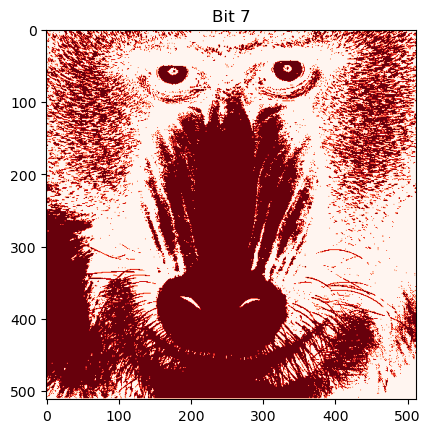

<class 'numpy.uint8'>
[[1 0 0 ... 0 1 1]
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
img_bit7 = (canalVermelho & 0b10000000) >> 7
#img_bit7 = img_bit7.astype(bool)
mostrar_imagem(img_bit7, "Bit 7", "Reds")
print(type(img_bit7[0,0]))
print(img_bit7)
# img_bit7 = (canalVermelho & 0b10000000)
# mostrar_imagem(img_bit7, "Bit 7", "gray")


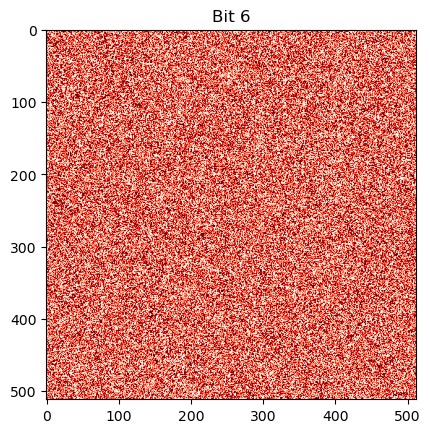

<class 'numpy.uint8'>
[[0 1 1 ... 1 1 1]
 [0 1 1 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [1 1 0 ... 0 0 1]
 [0 1 1 ... 1 1 0]
 [1 0 1 ... 1 0 0]]


In [78]:
img_bit6 = (canalVermelho & 0b00000001) >> 0
#img_bit7 = img_bit7.astype(bool)
mostrar_imagem(img_bit6, "Bit 6", "Reds")
print(type(img_bit6[0,0]))
print(img_bit6)
# img_bit7 = (canalVermelho & 0b10000000)
# mostrar_imagem(img_bit7, "Bit 7", "gray")

In [108]:
mensagem = "Voz das manhãs cantando pelos sinos, \nRosa mais alta no mais alto galho:\n\nDe quem me valerei, se não me valho \nDe ti, que tens a chave dos destinos "
mensagem_binaria = np.zeros(4*8*len(mensagem), dtype=int)
pos = 0
for caractere in mensagem:
    caractere_unicode = ord(caractere) # converte o caractere para o código unicode
    for i in range(32):
        a = (caractere_unicode & 1)
        mensagem_binaria[pos] = a
        pos += 1
        caractere_unicode = caractere_unicode >> 1
        
mensagem_binaria = mensagem_binaria[::-1]  

# realizar o processo inverso

mensagem_decodificada = ""
for i in range (0,len(mensagem_binaria),32):
    c_bin = 0
    for j in range(32):
        c_bin = c_bin << 1
        c_bin += mensagem_binaria[i+j]
    mensagem_decodificada += chr(c_bin)
mensagem_decodificada = mensagem_decodificada[::-1]
print(mensagem_decodificada)
    

Voz das manhãs cantando pelos sinos, 
Rosa mais alta no mais alto galho:

De quem me valerei, se não me valho 
De ti, que tens a chave dos destinos 


In [37]:
def transformar_texto_binario(texto: str):
    
    texto_binario = texto
    return texto_binario

In [38]:
def codificar(imagem, texto, plano_bits):
   
   texto_binario = transformar_texto_binario(texto)
   
   imagem_codificada = np.copy(imagem)
   return imagem_codificada

In [39]:
# def decodificar(imagem_codificada, plano_bits):
#     return texto

In [40]:
# Programa principal
# Abrir a imagem que será codificada
imagem = cv2.imread("peppers.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) 
#mostrar_imagem(imagem, "Imagem Original")
# Abrir o arquivo de texto que será codificado
texto = open("cod_simples.txt", "r").read()
#print(texto)

# Selecionar o plano de bits
plano_bits = 2

# Codificar o texto na imagem
imagem_codificada = codificar(imagem, texto, plano_bits)

# Mostrar resultados
# Decodificar o texto da imagem
# Mostrar resultados

Voz das manhãs cantando pelos sinos, 
Rosa mais alta no mais alto galho:

De quem me valerei, se não me valho 
De ti, que tens a chave dos destinos 
